In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']
print(X.shape)


(307, 2)


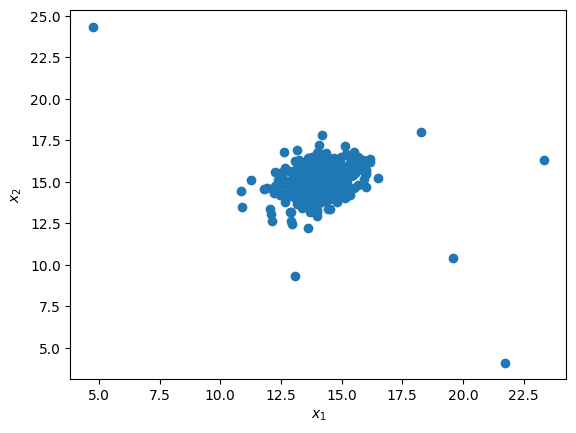

In [2]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

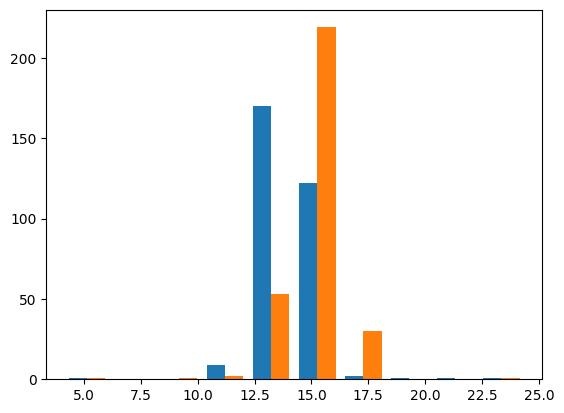

In [3]:
plt.hist(X)
plt.show()

#### Gaussian distribution

In [4]:
def estimate_gaussian(X):  
    return np.mean(X,axis = 0), np.std(X,axis = 0)
mean_x, std_x = estimate_gaussian(X)
print(estimate_gaussian(X))

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))


In [5]:
import scipy as sp
Xval = data['Xval']  
yval = data['yval']
print(Xval.shape, yval.shape)
sp.stats.norm.pdf(X[:50],loc = mean_x, scale = std_x)

(307, 2) (307, 1)


array([[0.21620977, 0.29928475],
       [0.25745208, 0.19539236],
       [0.29413223, 0.24631896],
       [0.24721192, 0.20353285],
       [0.27251547, 0.23369303],
       [0.2918119 , 0.14549894],
       [0.18713958, 0.25600918],
       [0.15117648, 0.24151341],
       [0.09356331, 0.19949913],
       [0.166609  , 0.30423483],
       [0.29338708, 0.09037578],
       [0.29448769, 0.28766234],
       [0.25559237, 0.27797121],
       [0.25595621, 0.27173864],
       [0.2932714 , 0.12881868],
       [0.2944456 , 0.28087687],
       [0.29288017, 0.29975441],
       [0.28518331, 0.3046332 ],
       [0.27727759, 0.24946431],
       [0.09489765, 0.10258106],
       [0.27027271, 0.28011206],
       [0.29342161, 0.30119392],
       [0.24110555, 0.15516046],
       [0.29304288, 0.29735436],
       [0.19607729, 0.21044271],
       [0.15652979, 0.15894753],
       [0.27590459, 0.28665754],
       [0.25749622, 0.29485051],
       [0.27667047, 0.2921371 ],
       [0.2834953 , 0.27033816],
       [0.

In [6]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
# calculate the probability for Xval data
pval_temp = sp.stats.norm.pdf(Xval,loc = mean_x, scale = std_x)
pval[:,0] =  pval_temp[:,0] * pval_temp[:,1]
pval_temp = sp.stats.norm.pdf(yval,loc = mean_x, scale = std_x)
pval[:,1] = pval_temp[:,0] * pval_temp[:,1]

### Selecting the threshold

In [7]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    max_f1 = 0
    best_p_val = 0
    for pvalue in np.linspace(np.min(pval), np.max(pval), 10000):
        anomaly_pred = (pval < pvalue).astype(int)
        if (x:=f1_score(yval,anomaly_pred)) > max_f1:
            max_f1 = x
            best_p_val = pvalue
    return best_p_val,max_f1

treshold, f1 = select_threshold(pval[:,0],yval)
print(treshold, f1)

anomaly_pred = (pval[:,0] < treshold).astype(int)




1.798350390892988e-05 0.8750000000000001


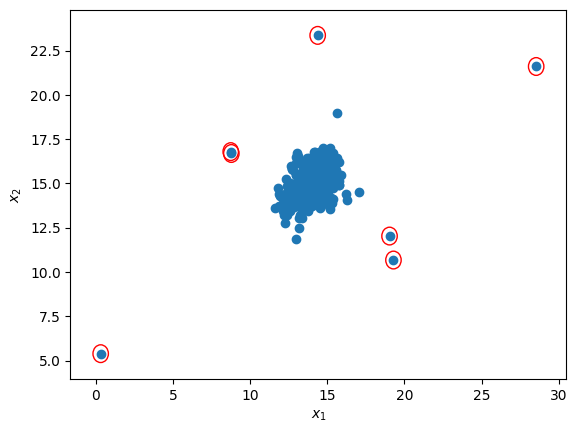

In [8]:
figure, axes = plt.subplots()
axes.scatter(Xval[:,0], Xval[:,1])
axes.set_xlabel("$x_1$")
axes.set_ylabel("$x_2$")
for n,i in enumerate(anomaly_pred):
    if i == 1:
        circle = plt.Circle(Xval[n], 0.5, color='r', fill=False)
        axes.add_patch(circle)
plt.show()